,dimension,grid,relax,alpha
0,1,40,cl nco,-3.912(42)
0,1,40,op co,-1.9356(64)
0,2,20,cl nco,-1.943(22)
0,2,20,op co,-1.752(27)
0,2,20,op nco,-1.906(73)
0,2,40,cl nco,-1.857(51)
0,2,40,op co,-1.745(32)
0,2,40,op nco,-1.88(16)
0,2,100,cl nco,-1.87(17)
0,3,20,cl nco,-1.8528(87)


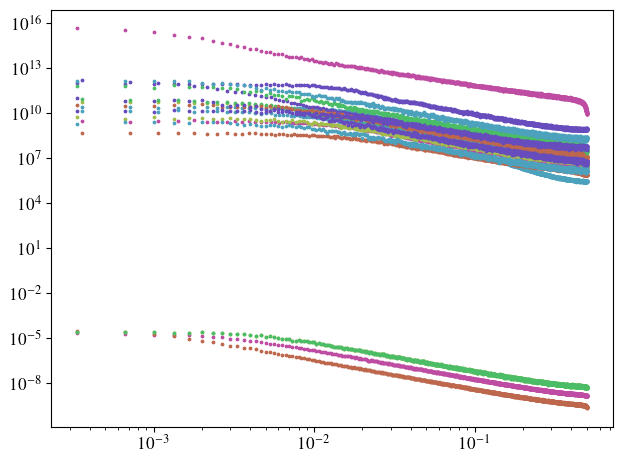

In [57]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import scipy
from analysis import *
from analysis import draw_slope
from utils import *
from computation import *
import json

# number 2, 5 error

with open("power_spectrum.json") as f:
    meta = json.load(f)
if isinstance(meta[0], int):
    meta = [meta[meta[0]]]
# meta = [meta[19]]
df = pd.DataFrame()

for m in meta:

    data_dir = pathlib.Path(m["path"])
    if not (data_dir / "mean_power_spectrum.npy").exists():
        print(f"File not found in {data_dir}")
        continue
    power = np.load(data_dir / "mean_power_spectrum.npy")[1:]
    freq = np.fft.rfftfreq(len(power) * 2, 1)[1:]

    limits = m.get("limits", [None, None])
    e, a = calculate_scaling_exponent(freq, power, limits)
    params = data_dir.name.split("_")
    df_new = pd.DataFrame({
        "dimension": int(params[0][1:]),
        "grid": int(params[1][1:]),
        "relax": f"{params[3]} {params[4]}",
        "alpha": e,
    }, index=[0])
    df = pd.concat([df, df_new])

    plt.scatter(freq, power, s=3)
    # plt.plot(freq, power)
    if len(meta) == 1:
        plt.plot(freq, np.exp(a.nominal_value) * freq ** e.nominal_value)
plt.xscale("log")
plt.yscale("log")
df = df.sort_values(["dimension", "grid", "relax"])
df = df.map(lambda x: "{:.2uS}".format(x) if isinstance(x, unc.core.AffineScalarFunc) else x)
df.to_csv("data/power_spectrum.csv")
df
